#  Unit 2.2 Data Compression, plus Images Lab
> Learning about Lossy and Lossless compression.  Lab will perform alterations on images, manipulate RGB values, and reduce the number of pixels.
- toc: true
- image: /images/python.png
- categories: []
- type: ap
- week: 26

## Enumerate Big Ideas from
> The [Image Lab Project](https://csp.nighthawkcodingsociety.com/starter/rgb/) contains a plethora of College Board Unit 2 and Unit 3 concepts. Enumerate some of the big ideas vocab ...
- 
- 
-
-

## Image Files and Size
> Here are some [Images Files](https://github.com/nighthawkcoders/nighthawk_csp/tree/master/starter/static/img).  WGet some of these files, load them on your machine.   Describe some of the properties of the files.  Describe files that are similar, but different ...
-
-
-
-

## Python Libraries and Concepts used in Images Lab

### numpy
> [Numpy](https://numpy.org/) is described as "The fundamental package for scientific computing with Python".  In the Image Lab, a Numpy array is created from the image data in order to simplify access and change to the RGB values of the pixels.

### PIL (Python Image Library)
> [Pillow or PIL](https://pillow.readthedocs.io/en/stable/) adds the ability to work with images in Python.  [Geeks for Geeks](https://www.geeksforgeeks.org/working-images-python/?ref=lbp) shows some ideas on working with images.  

### base64
> Data abstraction is in play when we save files.  It is common in working with files to refer to the file formats as Image formats, Audio formats, and Video formats, all of these are often called ***Binary File formats**.   In Web Application like Chrome, Safari, Edge they all focus on the usage of HTTP, or text file display like HTML.  Thus, [base64](https://en.wikipedia.org/wiki/Base64) utilities to convert binary encoded data (8-bit, ASCII/Unicode/Number abstractions) into a text encoded scheme 0f (24 bits, 6-bit Base64 digits).  Thus base64 is used to transport and embed binary images into textual assets such as HTML and CSS.
- How is Base65 similar or different to Binary and Hexadecimal?
- Translate first 3 letters of your name to Base64.

### io, BytesIO
> Input and Output (I/O) is a fundamental of all Computer Programming. Input/output (I/O) buffering is a technique used to optimize I/O operations.  In large quantities of data, how many frames of input the server currently has queued is the buffer.  Buffering is sometimes implemented directly in hardware or other times it is a combination of hardware and software.  
- Where have you been a consumer of buffering?  
- From your consumer experience, what effects have you experienced from buffering?  
- How do these effects apply to images?


### pathlib
> File paths are different on Windows versus Mac and Linux.  This can cause problems in a project as you work and deploy on different Operating Systems (OS's), pathlib is a solution to this problem. 
- What are commands you use in terminal to access files?
- What are the command you use in Windows terminal to access files?
- What are some of the major differences?


---- meta data -----
Clouds Impression
PNG
RGBA
(320, 234)
----  data  -----
[[[ 31  85 159 255]
  [ 31  85 159 255]
  [ 31  85 159 255]
  ...
  [128 105  63 255]
  [129 108  65 255]
  [129 109  67 255]]]
----  hex of color codes  -----
[['#1f559f' '#1f559f' '#1f559f' ... '#80693f' '#816c41' '#816d43']]
----  bin of color codes  -----
[['00011111 01010101 10011111' '00011111 01010101 10011111'
  '00011111 01010101 10011111' ... '10000000 01101001 00111111'
  '10000001 01101100 01000001' '10000001 01101101 01000011']]
----  gray data  -----
[[[ 91  91  91 255]
  [ 91  91  91 255]
  [ 91  91  91 255]
  ...
  [ 98  98  98 255]
  [100 100 100 255]
  [101 101 101 255]]]
----  base64  -----
['']


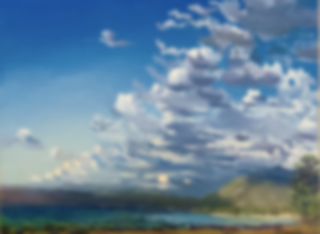

In [28]:
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import base64
from io import BytesIO
from pathlib import Path  # https://medium.com/@ageitgey/python-3-quick-tip-the-easy-way-to-deal-with-file-paths-on-windows-mac-and-linux-11a072b58d5f


# image (PNG, JPG) to base64 conversion (string), learn about base64 on wikipedia https://en.wikipedia.org/wiki/Base64
def image_base64(img, img_type):
    with BytesIO() as buffer:
        img.save(buffer, img_type)
        return base64.b64encode(buffer.getvalue()).decode()


# formatter preps base64 string for inclusion, ie <img src=[this return value] ... />
def image_formatter(img, img_type):
    return "data:image/" + img_type + ";base64," + image_base64(img, img_type)


# color_data prepares a series of images for data analysis
def image_data(path=Path("images/"), images=None):  # path of static images is defaulted
    if images is None:  # default image
        images = [
            {'source': "Peter Carolin", 'label': "Clouds Impression", 'file': "clouds-impression.png"}
        ]
    # gather analysis data and meta data for each image, adding attributes to each row in table
    for image in images:
        # File to open
        filename = path / image['file']  # file with path

        # Image open return PIL image object
        img_object = Image.open(filename)

        # Python Image Library operations
        image['format'] = img_object.format
        image['mode'] = img_object.mode
        image['size'] = img_object.size

        # Hacks to try for images https://www.tutorialspoint.com/python_pillow/index.htm
        img_object = img_object.filter(ImageFilter.GaussianBlur)  # use the opened img_object and replace with blur effect

        # Conversion of original PIL Image to Base64 Text, this is a text format is supported HTML and transfers over HTTP/HTTPs
        image['base64'] = image_formatter(img_object, image['format'])

        # Get data, use Numpy to access to data
        img_data = img_object.getdata()  # Reference https://www.geeksforgeeks.org/python-pil-image-getdata/
        image['data'] = np.array(img_data) # PIL image to numpy array key support
        image['hex_array'] = [] # key/value for converted to hex
        image['binary_array'] = [] # key/value for data converted to binary
        image['gray_data'] = [] # key/value for data converted to gray scale

        # 'data' is a list of RGB data, the list is traversed and hex and binary lists are calculated and formatted
        for pixel in image['data']:
            # hexadecimal conversions
            hex_value = hex(pixel[0])[-2:] + hex(pixel[1])[-2:] + hex(pixel[2])[-2:]
            hex_value = hex_value.replace("x", "0")
            image['hex_array'].append("#" + hex_value)
            
            # binary conversions
            bin_value = bin(pixel[0])[2:].zfill(8) + " " + bin(pixel[1])[2:].zfill(8) + " " + bin(pixel[2])[2:].zfill(8)
            image['binary_array'].append(bin_value)

            # create gray scale of image, ref: https://www.geeksforgeeks.org/convert-a-numpy-array-to-an-image/
            average = (pixel[0] + pixel[1] + pixel[2]) // 3  # average pixel values and use // for integer division
            if len(pixel) > 3:
                image['gray_data'].append((average, average, average, pixel[3]))
            else:
                image['gray_data'].append((average, average, average))
        # end for loop for pixels

        # Conversion of modified Image to Base64
        img_object.putdata(image['gray_data'])
        image['base64_GRAY'] = image_formatter(img_object, image['format'])

    # end for loop for images
    return images  # list is returned with all the attributes for each image in a dictionary

# Numpy limits terminal printing
def numpyPrint(title, data):
    data = np.array([data])
    print(title)
    print(data)
    
# run this as standalone tester to see sample data printed in terminal
if __name__ == "__main__":
    local_path = Path("images/")
    images = image_data(local_path)  # path of local run
    for image in images:
        # print some details about the image so you can validate that it looks like it is working
        # meta data
        print("---- meta data -----")
        print(image['label'])
        print(image['format'])
        print(image['mode'])
        print(image['size'])
        
        # data representations are key to this lab
        numpyPrint("----  data  -----", image['data'])
        numpyPrint("----  hex of color codes  -----", image['hex_array'])
        numpyPrint("----  bin of color codes  -----", image['binary_array'])
        numpyPrint("----  gray data  -----", image['gray_data'])
        numpyPrint("----  base64  -----",  image['base64'])

        # open original image
        title = image['label'] + " by " + image['source'] + " {0} X {1}".format(*image['size'])
        filename = local_path / image['file']
        img_object = Image.open(filename)
        draw = ImageDraw.Draw(img_object)
        draw.text((1, 1), title)  # draw in image
        # open image
        img_object.show()

        # put grey data on image
        img_object.putdata(image['gray_data'])
        draw = ImageDraw.Draw(img_object)
        draw.text((1, 1), title)  # draw in image
        # open image
        img_object.show()


    print()